In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import numpy as np



In [2]:
dfETH = pd.read_csv('gq-implied-volatility-forecasting/train/ETH.csv')
dfBTC = pd.read_csv('gq-implied-volatility-forecasting/train/BTC.csv')


In [17]:

def mad_based_outlier_flags(df, threshold=100):
    """
    Flags rows in a DataFrame as outliers if ANY value in the row
    is an outlier based on Median Absolute Deviation (MAD).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame (numeric only or mixed).
        threshold (float): Z-score cutoff for outliers (default 10).
        
    Returns:
        pd.DataFrame: Original DataFrame with an added column 'is_outlier'.
    """
    # Ensure numeric data only
    numeric_df = df[['ask_price1_ETH', 'bid_price1_ETH','ask_price2_ETH','ask_price2_ETH', 'bid_price3_ETH','ask_price3_ETH', 'bid_price4_ETH','ask_price4_ETH', 'bid_price5_ETH','ask_price5_ETH']]  # Adjust columns as needed

    # Compute row-wise medians
    row_median = numeric_df.median(axis=1)
    
    # Compute MAD for each row
    mad = (numeric_df.sub(row_median, axis=0).abs()).median(axis=1)
    
    # Compute modified z-scores for each element
    modified_z = 0.6745 * (numeric_df.sub(row_median, axis=0).abs()).div(mad, axis=0)
    
    # Flag a row if ANY value in that row exceeds threshold
    row_flags = (modified_z > threshold).any(axis=1)
    print(row_flags.value_counts())
    # Attach result
    df = df.copy()
    df["is_outlier"] = row_flags
    # Set all columns except timestamp to NaN where is_outlier is True
    return df


In [4]:


#dfETH = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
dfETH['timestamp'] = pd.to_datetime(dfETH['timestamp'])
dfETH["label"] = dfETH["label"].replace(0.0, np.nan)

df_checked = mad_based_outlier_flags(dfETH.copy(), threshold=100)

# Identify which columns to modify (all except timestamp and is_outlier)
cols_to_modify = df_checked.columns.difference(['timestamp', 'is_outlier'])

# Set outlier rows to NaN
df_checked.loc[df_checked["is_outlier"], cols_to_modify] = np.nan

# Interpolate missing values
df_checked[cols_to_modify] = df_checked[cols_to_modify].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)

# Finally drop the helper column
df_checked = df_checked.drop(columns=['is_outlier'])

# Drop rows still containing NaN (if interpolation failed)
df_checked = df_checked.dropna()


False    631291
True          1
Name: count, dtype: int64


In [5]:
cleaned_ETH = df_checked.to_csv('ETH_cleaned.csv')

In [7]:


#dfETH = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
dfBTC['timestamp'] = pd.to_datetime(dfBTC['timestamp'])
#dfBTC["label"] = dfBTC["label"].replace(0.0, np.nan)

df_checked = mad_based_outlier_flags(dfBTC.copy(), threshold=100)

# Identify which columns to modify (all except timestamp and is_outlier)
#cols_to_modify = df_checked.columns.difference(['timestamp', 'is_outlier'])
cols_to_modify = df_checked.columns.difference(['timestamp', 'is_outlier'])

# Set outlier rows to NaN
df_checked.loc[df_checked["is_outlier"], cols_to_modify] = np.nan

# Interpolate missing values
df_checked[cols_to_modify] = df_checked[cols_to_modify].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)

# Finally drop the helper column
df_checked = df_checked.drop(columns=['is_outlier'])

# Drop rows still containing NaN (if interpolation failed)
df_checked = df_checked.dropna()


False    631292
Name: count, dtype: int64


In [8]:
df_checked.to_csv('BTC_cleaned.csv')

In [10]:
btc_cleaned = pd.read_csv('gq-implied-volatility-forecasting/train/BTC.csv')
btc_cleaned['timestamp'] = pd.to_datetime(btc_cleaned['timestamp'])
btc_cleaned['timestamp'] = btc_cleaned['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
btc_cleaned.to_csv('BTC_cleaned_with_seconds.csv', index=False)

/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/98970438.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  btc_cleaned['timestamp'] = pd.to_datetime(btc_cleaned['timestamp'])


In [13]:
import pandas as pd

df1 = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df2 = pd.read_csv("gq-implied-volatility-forecasting/train/BTC.csv").drop(columns=["timestamp"])

merged = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
merged.to_csv("merged.csv", index=False)


In [16]:
import pandas as pd

df1 = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
df2 = pd.read_csv("gq-implied-volatility-forecasting/train/BTC.csv").drop(columns=["timestamp"])

# Add suffixes to column names
df1 = df1.add_suffix("_ETH")
df2 = df2.add_suffix("_BTC")

# Reset index and merge side by side
merged = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)

merged.to_csv("merged.csv", index=False)


In [15]:
merged.shape

(631292, 44)

In [18]:
#dfETH = pd.read_csv("gq-implied-volatility-forecasting/train/ETH.csv")
merged['timestamp_ETH'] = pd.to_datetime(merged['timestamp_ETH'])
merged["label_ETH"] = merged["label_ETH"].replace(0.0, np.nan)

df_checked = mad_based_outlier_flags(merged.copy(), threshold=100)

# Identify which columns to modify (all except timestamp and is_outlier)
cols_to_modify = df_checked.columns.difference(['timestamp_ETH', 'is_outlier'])

# Set outlier rows to NaN
df_checked.loc[df_checked["is_outlier"], cols_to_modify] = np.nan

# Interpolate missing values
df_checked[cols_to_modify] = df_checked[cols_to_modify].interpolate(
    method="linear",
    limit=20,
    limit_direction="both"
)

# Finally drop the helper column
df_checked = df_checked.drop(columns=['is_outlier'])

# Drop rows still containing NaN (if interpolation failed)
#df_checked = df_checked.dropna()

False    631291
True          1
Name: count, dtype: int64


In [30]:
defval.to_csv("merged_cleaned1.csv", index=False)

In [21]:
df_checked = df_checked.dropna(subset=['label_ETH'])

In [50]:
import pandas as pd
import numpy as np

def generate_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # ========= ETH Features =========
    out["spread_eth"] = out["ask_price1_ETH"] - out["bid_price1_ETH"]

    for d in range(1, 6):
        out[f"imb_eth_{d}"] = (
            (out[f"bid_volume{d}_ETH"] - out[f"ask_volume{d}_ETH"]) /
            (out[f"bid_volume{d}_ETH"] + out[f"ask_volume{d}_ETH"] + 1e-9)
        )

    out["cum_bid_vol_eth"] = sum(out[f"bid_volume{d}_ETH"] for d in range(1, 6))
    out["cum_ask_vol_eth"] = sum(out[f"ask_volume{d}_ETH"] for d in range(1, 6))
    out["cum_imb_eth"] = (
        (out["cum_bid_vol_eth"] - out["cum_ask_vol_eth"]) /
        (out["cum_bid_vol_eth"] + out["cum_ask_vol_eth"] + 1e-9)
    )

    out["vwap_bid_eth"] = (
        sum(out[f"bid_price{d}_ETH"] * out[f"bid_volume{d}_ETH"] for d in range(1, 6))
        / (out["cum_bid_vol_eth"] + 1e-9)
    )
    out["vwap_ask_eth"] = (
        sum(out[f"ask_price{d}_ETH"] * out[f"ask_volume{d}_ETH"] for d in range(1, 6))
        / (out["cum_ask_vol_eth"] + 1e-9)
    )

    out["eth_ret"] = out["mid_price_ETH"].pct_change()
    for w in [5, 10, 30]:
        out[f"eth_vol_{w}"] = out["eth_ret"].rolling(w).std()

    # Rolling vol (consecutive timestamps only)
    out["time_diff"] = out["timestamp_ETH"].diff().dt.total_seconds()
    consecutive_groups = (out["time_diff"] != 1).cumsum()

    def rolling_std_consecutive(group):
        if len(group) >= 10:
            return group["mid_price_ETH"].rolling(10, min_periods=1).std()
        else:
            return group["mid_price_ETH"].rolling(len(group), min_periods=1).std()

    out["rolling_vol_mid_eth"] = (
        out.groupby(consecutive_groups).apply(rolling_std_consecutive).reset_index(level=0, drop=True)
    )

    # ========= BTC Features =========
    out["spread_btc"] = out["ask_price1_BTC"] - out["bid_price1_BTC"]

    for d in range(1, 6):
        out[f"imb_btc_{d}"] = (
            (out[f"bid_volume{d}_BTC"] - out[f"ask_volume{d}_BTC"]) /
            (out[f"bid_volume{d}_BTC"] + out[f"ask_volume{d}_BTC"] + 1e-9)
        )

    out["cum_bid_vol_btc"] = sum(out[f"bid_volume{d}_BTC"] for d in range(1, 6))
    out["cum_ask_vol_btc"] = sum(out[f"ask_volume{d}_BTC"] for d in range(1, 6))
    out["cum_imb_btc"] = (
        (out["cum_bid_vol_btc"] - out["cum_ask_vol_btc"]) /
        (out["cum_bid_vol_btc"] + out["cum_ask_vol_btc"] + 1e-9)
    )

    out["vwap_bid_btc"] = (
        sum(out[f"bid_price{d}_BTC"] * out[f"bid_volume{d}_BTC"] for d in range(1, 6))
        / (out["cum_bid_vol_btc"] + 1e-9)
    )
    out["vwap_ask_btc"] = (
        sum(out[f"ask_price{d}_BTC"] * out[f"ask_volume{d}_BTC"] for d in range(1, 6))
        / (out["cum_ask_vol_btc"] + 1e-9)
    )

    out["btc_ret"] = out["mid_price_BTC"].pct_change()
    for w in [5, 10, 30]:
        out[f"btc_vol_{w}"] = out["btc_ret"].rolling(w).std()

    # Rolling vol (consecutive timestamps only)
    def rolling_std_consecutive_btc(group):
        if len(group) >= 10:
            return group["mid_price_BTC"].rolling(10, min_periods=1).std()
        else:
            return group["mid_price_BTC"].rolling(len(group), min_periods=1).std()

    out["rolling_vol_mid_btc"] = (
        out.groupby(consecutive_groups).apply(rolling_std_consecutive_btc).reset_index(level=0, drop=True)
    )

    # ========= Cross-Asset Features =========
    out["eth_btc_spread"] = out["mid_price_ETH"] - out["mid_price_BTC"]
    out["eth_btc_ratio"] = out["mid_price_ETH"] / (out["mid_price_BTC"] + 1e-9)

    for w in [5, 10, 30]:
        out[f"eth_btc_corr_{w}"] = out["eth_ret"].rolling(w).corr(out["btc_ret"])

    for lag in [1, 2, 5]:
        out[f"btc_ret_lag{lag}"] = out["btc_ret"].shift(lag)

    out["btc_liq_ratio"] = (
        (out["cum_bid_vol_btc"] + out["cum_ask_vol_btc"]) /
        (out["cum_bid_vol_eth"] + out["cum_ask_vol_eth"] + 1e-9)
    )
    out["rel_imb"] = out["cum_imb_eth"] - out["cum_imb_btc"]

    for w in [30, 60, 120]:
        roll_mean = out["eth_btc_spread"].rolling(w).mean()
        roll_std = out["eth_btc_spread"].rolling(w).std()
        out[f"zscore_spread_{w}"] = (out["eth_btc_spread"] - roll_mean) / (roll_std + 1e-9)

    out["btc_top_imb"] = (
        (out["bid_volume1_BTC"] - out["ask_volume1_BTC"]) /
        (out["bid_volume1_BTC"] + out["ask_volume1_BTC"] + 1e-9)
    )
    out["btc_imb_lead_eth"] = out["btc_top_imb"].shift(1) * out["eth_ret"]

    return out


In [34]:
vals = pd.read_csv("merged_cleaned1.csv")
vals.dtypes
vals['timestamp_ETH'] = pd.to_datetime(vals['timestamp_ETH'])

In [35]:
vals.to_csv("merged_cleaned1.csv", index=False)

In [36]:
vals2 = pd.read_csv("merged_cleaned1.csv")
vals2.dtypes

timestamp_ETH       object
mid_price_ETH      float64
bid_price1_ETH     float64
bid_volume1_ETH    float64
bid_price2_ETH     float64
bid_volume2_ETH    float64
bid_price3_ETH     float64
bid_volume3_ETH    float64
bid_price4_ETH     float64
bid_volume4_ETH    float64
bid_price5_ETH     float64
bid_volume5_ETH    float64
ask_price1_ETH     float64
ask_volume1_ETH    float64
ask_price2_ETH     float64
ask_volume2_ETH    float64
ask_price3_ETH     float64
ask_volume3_ETH    float64
ask_price4_ETH     float64
ask_volume4_ETH    float64
ask_price5_ETH     float64
ask_volume5_ETH    float64
label_ETH          float64
mid_price_BTC      float64
bid_price1_BTC     float64
bid_volume1_BTC    float64
bid_price2_BTC     float64
bid_volume2_BTC    float64
bid_price3_BTC     float64
bid_volume3_BTC    float64
bid_price4_BTC     float64
bid_volume4_BTC    float64
bid_price5_BTC     float64
bid_volume5_BTC    float64
ask_price1_BTC     float64
ask_volume1_BTC    float64
ask_price2_BTC     float64
a

In [38]:
import pandas as pd

df = pd.read_csv("merged_cleaned1.csv")
df["timestamp_ETH"] = pd.to_datetime(df["timestamp_ETH"])
df.to_csv("merged_cleaned1.csv", index=False)

In [39]:
df = pd.read_csv("merged_cleaned1.csv")
df.dtypes

timestamp_ETH       object
mid_price_ETH      float64
bid_price1_ETH     float64
bid_volume1_ETH    float64
bid_price2_ETH     float64
bid_volume2_ETH    float64
bid_price3_ETH     float64
bid_volume3_ETH    float64
bid_price4_ETH     float64
bid_volume4_ETH    float64
bid_price5_ETH     float64
bid_volume5_ETH    float64
ask_price1_ETH     float64
ask_volume1_ETH    float64
ask_price2_ETH     float64
ask_volume2_ETH    float64
ask_price3_ETH     float64
ask_volume3_ETH    float64
ask_price4_ETH     float64
ask_volume4_ETH    float64
ask_price5_ETH     float64
ask_volume5_ETH    float64
label_ETH          float64
mid_price_BTC      float64
bid_price1_BTC     float64
bid_volume1_BTC    float64
bid_price2_BTC     float64
bid_volume2_BTC    float64
bid_price3_BTC     float64
bid_volume3_BTC    float64
bid_price4_BTC     float64
bid_volume4_BTC    float64
bid_price5_BTC     float64
bid_volume5_BTC    float64
ask_price1_BTC     float64
ask_volume1_BTC    float64
ask_price2_BTC     float64
a

In [40]:
df11 = pd.read_csv("merged_cleaned1.csv")
df11['timestamp_ETH'] = pd.to_datetime(df11['timestamp_ETH'])

merged_feature_dataframe = generate_features(df11)

/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/1265453247.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out["eth_ret"] = out["mid_price_ETH"].pct_change()
/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/1265453247.py:75: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out["btc_ret"] = out["mid_price_BTC"].pct_change()


In [41]:
merged_feature_dataframe.to_csv("all_features1.csv", index=False)

In [28]:
defval = pd.read_csv("merged_cleaned1.csv")
defval.dtypes
defval['timestamp_ETH'] = pd.to_datetime(defval['timestamp_ETH'])

In [29]:
defval.dtypes

timestamp_ETH      datetime64[ns]
mid_price_ETH             float64
bid_price1_ETH            float64
bid_volume1_ETH           float64
bid_price2_ETH            float64
bid_volume2_ETH           float64
bid_price3_ETH            float64
bid_volume3_ETH           float64
bid_price4_ETH            float64
bid_volume4_ETH           float64
bid_price5_ETH            float64
bid_volume5_ETH           float64
ask_price1_ETH            float64
ask_volume1_ETH           float64
ask_price2_ETH            float64
ask_volume2_ETH           float64
ask_price3_ETH            float64
ask_volume3_ETH           float64
ask_price4_ETH            float64
ask_volume4_ETH           float64
ask_price5_ETH            float64
ask_volume5_ETH           float64
label_ETH                 float64
mid_price_BTC             float64
bid_price1_BTC            float64
bid_volume1_BTC           float64
bid_price2_BTC            float64
bid_volume2_BTC           float64
bid_price3_BTC            float64
bid_volume3_BT

In [55]:
featurevals = pd.read_csv("all_features1.csv")

In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = featurevals.drop(columns=["label_ETH", "timestamp_ETH","time_diff"])
y = featurevals["label_ETH"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)

In [44]:
dtrain

In [57]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Prepare validation data (optional)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use 'binary:logistic' for classification
    'eval_metric': 'rmse',           # Evaluation metric
    'max_depth': 6,                  # Maximum depth of trees
    'eta': 0.1,                      # Learning rate
    'nthread': 4,                    # Number of threads
    'seed': 42                       # Random seed
}

# Train the model
evals = [(dtrain, 'train'), (dtest, 'eval')]  # Evaluation sets
num_boost_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_boost_round, evals, early_stopping_rounds=10)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:0.00006	eval-rmse:0.00006
[1]	train-rmse:0.00005	eval-rmse:0.00006
[2]	train-rmse:0.00005	eval-rmse:0.00005
[3]	train-rmse:0.00005	eval-rmse:0.00005
[4]	train-rmse:0.00005	eval-rmse:0.00005
[5]	train-rmse:0.00005	eval-rmse:0.00005
[6]	train-rmse:0.00005	eval-rmse:0.00005
[7]	train-rmse:0.00005	eval-rmse:0.00005
[8]	train-rmse:0.00004	eval-rmse:0.00005
[9]	train-rmse:0.00004	eval-rmse:0.00005
[10]	train-rmse:0.00004	eval-rmse:0.00005
[11]	train-rmse:0.00004	eval-rmse:0.00004
[12]	train-rmse:0.00004	eval-rmse:0.00004
[13]	train-rmse:0.00004	eval-rmse:0.00004
[14]	train-rmse:0.00004	eval-rmse:0.00004
[15]	train-rmse:0.00004	eval-rmse:0.00004
[16]	train-rmse:0.00004	eval-rmse:0.00004
[17]	train-rmse:0.00004	eval-rmse:0.00004
[18]	train-rmse:0.00004	eval-rmse:0.00004
[19]	train-rmse:0.00004	eval-rmse:0.00004
[20]	train-rmse:0.00004	eval-rmse:0.00004
[21]	train-rmse:0.00004	eval-rmse:0.00004
[22]	train-rmse:0.00004	eval-rmse:0.00004
[23]	train-rmse:0.00004	eval-rmse:0.00004
[2

In [58]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between predicted and actual values
corr, _ = pearsonr(y_test, y_pred)
print(f"Pearson Correlation: {corr}")

Pearson Correlation: 0.7142964395843061


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [59]:
import pandas as pd

df1test = pd.read_csv("gq-implied-volatility-forecasting/test/ETH.csv")
df2test = pd.read_csv("gq-implied-volatility-forecasting/test/BTC.csv")

# Add suffixes to column names
df1test = df1test.add_suffix("_ETH")
df2test = df2test.add_suffix("_BTC")

# Reset index and merge side by side
mergedmore = pd.concat([df1test.reset_index(drop=True), df2test.reset_index(drop=True)], axis=1)

mergedmore.to_csv("mergedmorefeatures.csv", index=False)

In [60]:
model.save_model('xgb_model_morefeatures.json')

In [75]:
import pandas as pd
import numpy as np

def generate_features_train(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # ========= ETH Features =========
    out["spread_eth"] = out["ask_price1_ETH"] - out["bid_price1_ETH"]

    for d in range(1, 6):
        out[f"imb_eth_{d}"] = (
            (out[f"bid_volume{d}_ETH"] - out[f"ask_volume{d}_ETH"]) /
            (out[f"bid_volume{d}_ETH"] + out[f"ask_volume{d}_ETH"] + 1e-9)
        )
        

    out["cum_bid_vol_eth"] = sum(out[f"bid_volume{d}_ETH"] for d in range(1, 6))
    out["cum_ask_vol_eth"] = sum(out[f"ask_volume{d}_ETH"] for d in range(1, 6))
    out["cum_imb_eth"] = (
        (out["cum_bid_vol_eth"] - out["cum_ask_vol_eth"]) /
        (out["cum_bid_vol_eth"] + out["cum_ask_vol_eth"] + 1e-9)
    )

    out["vwap_bid_eth"] = (
        sum(out[f"bid_price{d}_ETH"] * out[f"bid_volume{d}_ETH"] for d in range(1, 6))
        / (out["cum_bid_vol_eth"] + 1e-9)
    )
    out["vwap_ask_eth"] = (
        sum(out[f"ask_price{d}_ETH"] * out[f"ask_volume{d}_ETH"] for d in range(1, 6))
        / (out["cum_ask_vol_eth"] + 1e-9)
    )

    out["eth_ret"] = out["mid_price_ETH"].pct_change()
    for w in [5, 10, 30]:
        out[f"eth_vol_{w}"] = out["eth_ret"].rolling(w).std()

    # Rolling vol (consecutive timestamps only)
    '''out["time_diff"] = out["timestamp_ETH"].diff().dt.total_seconds()
    consecutive_groups = (out["time_diff"] != 1).cumsum()'''

    def rolling_std_consecutive(group):
        if len(group) >= 10:
            return group["mid_price_ETH"].rolling(10, min_periods=1).std()
        else:
            return group["mid_price_ETH"].rolling(len(group), min_periods=1).std()

    out["rolling_vol_mid_eth"] = out['mid_price_ETH'].rolling(window=10, min_periods=1).std()

    # ========= BTC Features =========
    out["spread_btc"] = out["ask_price1_BTC"] - out["bid_price1_BTC"]

    for d in range(1, 6):
        out[f"imb_btc_{d}"] = (
            (out[f"bid_volume{d}_BTC"] - out[f"ask_volume{d}_BTC"]) /
            (out[f"bid_volume{d}_BTC"] + out[f"ask_volume{d}_BTC"] + 1e-9)
        )

    out["cum_bid_vol_btc"] = sum(out[f"bid_volume{d}_BTC"] for d in range(1, 6))
    out["cum_ask_vol_btc"] = sum(out[f"ask_volume{d}_BTC"] for d in range(1, 6))
    out["cum_imb_btc"] = (
        (out["cum_bid_vol_btc"] - out["cum_ask_vol_btc"]) /
        (out["cum_bid_vol_btc"] + out["cum_ask_vol_btc"] + 1e-9)
    )

    out["vwap_bid_btc"] = (
        sum(out[f"bid_price{d}_BTC"] * out[f"bid_volume{d}_BTC"] for d in range(1, 6))
        / (out["cum_bid_vol_btc"] + 1e-9)
    )
    out["vwap_ask_btc"] = (
        sum(out[f"ask_price{d}_BTC"] * out[f"ask_volume{d}_BTC"] for d in range(1, 6))
        / (out["cum_ask_vol_btc"] + 1e-9)
    )

    out["btc_ret"] = out["mid_price_BTC"].pct_change()
    for w in [5, 10, 30]:
        out[f"btc_vol_{w}"] = out["btc_ret"].rolling(w).std()

    # Rolling vol (consecutive timestamps only)
    def rolling_std_consecutive_btc(group):
        if len(group) >= 10:
            return group["mid_price_BTC"].rolling(10, min_periods=1).std()
        else:
            return group["mid_price_BTC"].rolling(len(group), min_periods=1).std()

    out["rolling_vol_mid_btc"] = out['mid_price_BTC'].rolling(window=10, min_periods=1).std()

    # ========= Cross-Asset Features =========
    out["eth_btc_spread"] = out["mid_price_ETH"] - out["mid_price_BTC"]
    out["eth_btc_ratio"] = out["mid_price_ETH"] / (out["mid_price_BTC"] + 1e-9)

    for w in [5, 10, 30]:
        out[f"eth_btc_corr_{w}"] = out["eth_ret"].rolling(w).corr(out["btc_ret"])

    for lag in [1, 2, 5]:
        out[f"btc_ret_lag{lag}"] = out["btc_ret"].shift(lag)

    out["btc_liq_ratio"] = (
        (out["cum_bid_vol_btc"] + out["cum_ask_vol_btc"]) /
        (out["cum_bid_vol_eth"] + out["cum_ask_vol_eth"] + 1e-9)
    )
    out["rel_imb"] = out["cum_imb_eth"] - out["cum_imb_btc"]

    for w in [30, 60, 120]:
        roll_mean = out["eth_btc_spread"].rolling(window=w, min_periods=1).mean()
        roll_std = out["eth_btc_spread"].rolling(window=w, min_periods=1).std()
        out[f"zscore_spread_{w}"] = (out["eth_btc_spread"] - roll_mean) / (roll_std + 1e-9)

    out["btc_top_imb"] = (
        (out["bid_volume1_BTC"] - out["ask_volume1_BTC"]) /
        (out["bid_volume1_BTC"] + out["ask_volume1_BTC"] + 1e-9)
    )
    out["btc_imb_lead_eth"] = out["btc_top_imb"].shift(1) * out["eth_ret"]

    return out


In [76]:
testingp = generate_features_train(mergedmore  )

/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/3439085427.py:33: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out["eth_ret"] = out["mid_price_ETH"].pct_change()
/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/3439085427.py:74: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out["btc_ret"] = out["mid_price_BTC"].pct_change()


In [77]:
import xgboost as xgb

# Drop timestamp_ETH column for prediction
X_test_features = testingp.drop(columns=["timestamp_ETH","timestamp_BTC"])

# Load the trained model
model_loaded = xgb.Booster()
model_loaded.load_model('xgb_model_morefeatures.json')

# Prepare DMatrix for prediction
dtest_features = xgb.DMatrix(X_test_features)

# Make predictions
y_pred_test = model_loaded.predict(dtest_features)

In [79]:
result_df = pd.DataFrame({
    'timestamp': range(1,len(y_pred_test)+1),
    'labels': y_pred_test
})

# Save to CSV
result_df.to_csv('y_val_pred_predictions_3.csv', index=False)
print("Predictions saved to 'y_val_pred_predictions_3.csv'")

Predictions saved to 'y_val_pred_predictions_3.csv'


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


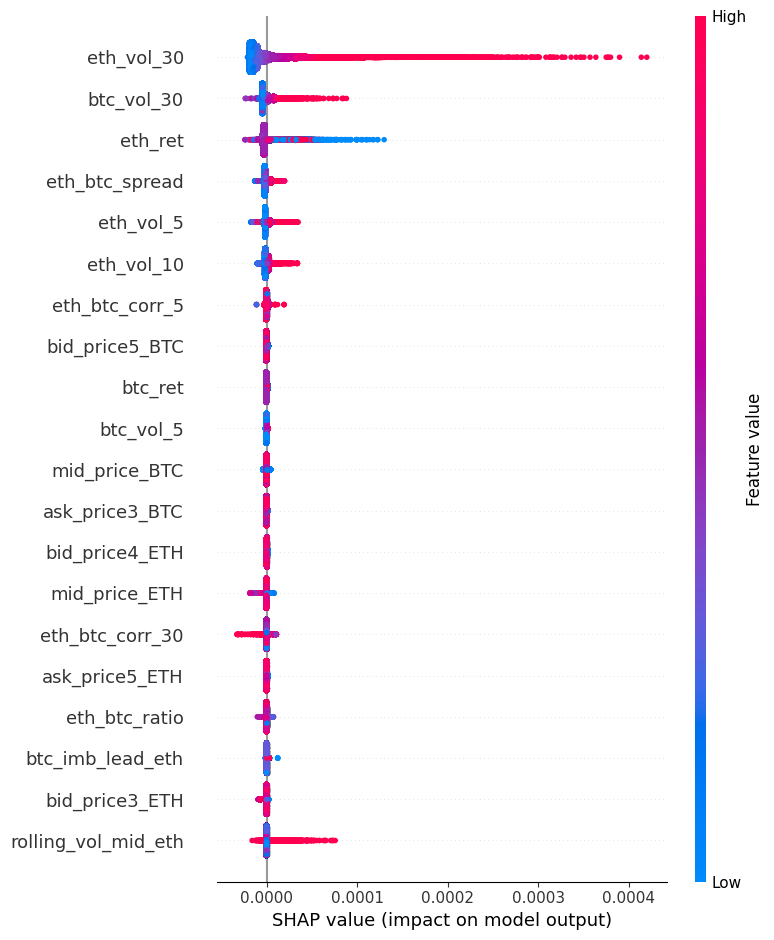

In [65]:
import xgboost as xgb
import shap
import pandas as pd

# Load the trained XGBoost model from JSON
model = xgb.Booster()
model.load_model('xgb_model_morefeatures.json')

# Load the dataset for which SHAP values are to be computed
data = pd.read_csv("all_features1.csv")
X = data.drop(columns=["label_ETH", "timestamp_ETH", "time_diff"])  # Drop non-feature columns

# Convert the dataset to DMatrix
dtest = xgb.DMatrix(X)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X)

# Visualize SHAP values (summary plot)
shap.summary_plot(shap_values, X)

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from scipy.stats import randint, uniform, pearsonr

# --------------------------
# Example: load your data
# X = ...
# y = ...
# --------------------------

# --- Chronological train-test split (e.g., 80% / 20%) ---

X = data.drop(columns=['timestamp_ETH', 'label_ETH', 'time_diff'])
y = data['label_ETH']
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train_full, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train_full, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# --- Pearson correlation scorer ---
def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

# --- Base model ---
xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

# --- Hyperparameter search space ---
param_dist = {
    "n_estimators": randint(200, 1000),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "min_child_weight": randint(1, 10),
    "reg_alpha": uniform(0, 1),
}

# --- Cross-validation setup: chronological folds ---
cv = TimeSeriesSplit(n_splits=5)

# --- Randomized hyperparameter search with CV ---
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=pearson_scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# --- Hyperparameter tuning ---
search.fit(X_train_scaled, y_train_full)

print("Best hyperparameters:", search.best_params_)
print("Best CV Pearson:", search.best_score_)

# --- Final evaluation on held-out test set ---
best_model_more_features = search.best_estimator_
best_model_more_features.fit(X_train_scaled, y_train_full)
y_pred = best_model_more_features.predict(X_test_scaled)
test_corr = pearson_corr(y_test, y_pred)

print("Test Pearson:", test_corr)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/869790641.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
/var/folders/9g/z7mw9w913l31htrfzlb6lz6w0000gn/T/ipykernel_58848/869790641.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)
/Library/Framew

Best hyperparameters: {'colsample_bytree': np.float64(0.9990961940195767), 'learning_rate': np.float64(0.063356202855057), 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 419, 'reg_alpha': np.float64(0.05147875124998935), 'subsample': np.float64(0.7114585856946446)}
Best CV Pearson: 0.4777820088928391
Test Pearson: 0.6204064746904282


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_stats_py.py:4776: RuntimeWarning: overflow encountered in vecdot
  r = xp.vecdot(xm / normxm, ym / normym, axis=axis)


In [70]:
y_predictions = best_model_more_features.predict(testingp.drop(columns=["timestamp_ETH","timestamp_BTC"]))

In [71]:
result_df = pd.DataFrame({
    'timestamp': range(1,len(y_predictions)+1),
    'labels': y_predictions
})

# Save to CSV
result_df.to_csv('y_val_pred_predictions_4.csv', index=False)
print("Predictions saved to 'y_val_pred_predictions_4.csv'")

Predictions saved to 'y_val_pred_predictions_4.csv'


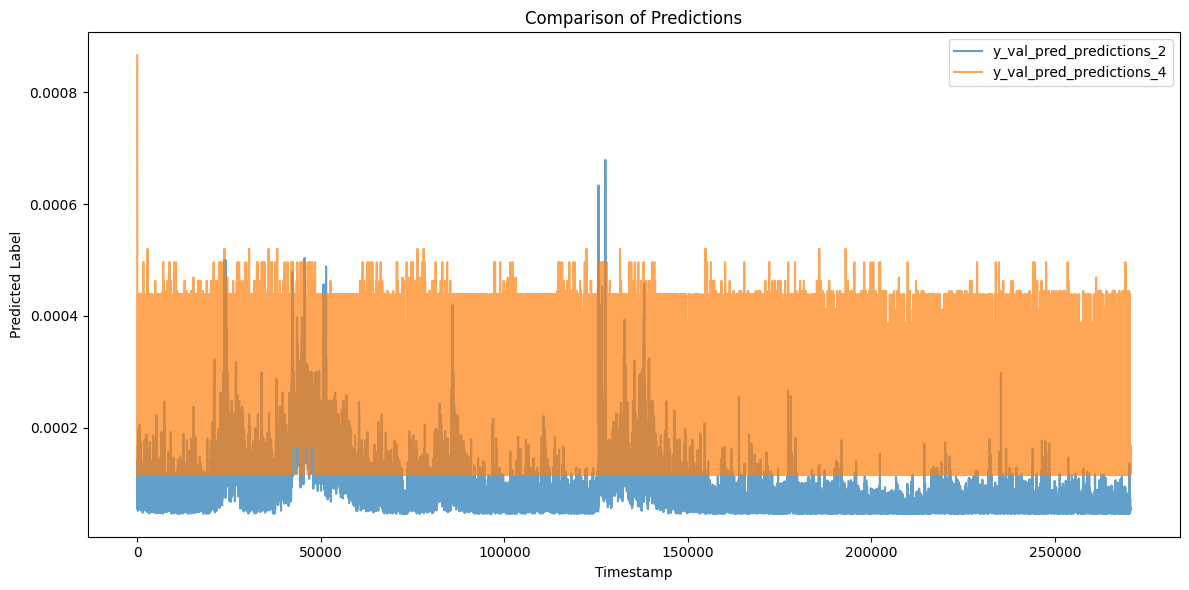

In [74]:
import pandas as pd

import matplotlib.pyplot as plt

# Load predictions
df_pred2 = pd.read_csv('y_val_pred_predictions_2.csv')
df_pred4 = pd.read_csv('y_val_pred_predictions_4.csv')

plt.figure(figsize=(12, 6))
plt.plot(df_pred2['timestamp'], df_pred2['labels'], label='y_val_pred_predictions_2', alpha=0.7)
plt.plot(df_pred4['timestamp'], df_pred4['labels']*100-.005, label='y_val_pred_predictions_4', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Predicted Label')
plt.title('Comparison of Predictions')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_pred3 = pd.read_csv('y_val_pred_predictions_3.csv')

plt.figure(figsize=(12, 6))
plt.plot(df_pred2['timestamp'], df_pred2['labels'], label='y_val_pred_predictions_2', alpha=0.7)
plt.plot(df_pred3['timestamp'], df_pred3['labels'], label='y_val_pred_predictions_3', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Predicted Label')
plt.title('Comparison of Predictions')
plt.legend()
plt.tight_layout()
plt.show()